#### Project Proposal: Medical Appointments No Shows (Part 1)

Data:
https://www.kaggle.com/joniarroba/noshowappointments


- rate of appointments? up or down?
- patients reporting on time of their scheduled appointments? yes/no
- determine characteristics of patients to show up - enable to take countermeasure (constant appointment reminders, doctors & hospital staff adequate with demand)

In [1]:
# Notebook setup
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os
from pathlib import Path

import pylab as plt

import datetime as dt

# Plotting imports and settings
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,8)
import seaborn as sns

# To make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Term Project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### Exploratory Data Analysis

In [3]:
# Read in data into a dataframe 
data = pd.read_csv('data/KaggleV2-May-2016.csv')

# Display top of dataframe
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Frequency of distint values in each feature set
for column in list(data.columns):
    print ("{0:25} {1}".format(column, data[column].nunique()))

PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


In [6]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Function to plot all features of the dataset
def features_plots(discrete_vars):

    plt.figure(figsize=(15,24))

    for i, cv in enumerate(['Age']):
        plt.subplot(7, 2, i+1)
        plt.hist(data[cv], bins=len(data[cv].unique()))
        plt.title(cv)
        plt.ylabel('Frequency')

    for i, dv in enumerate(discrete_vars):
        plt.subplot(7, 2, i+3)
        data[dv].value_counts().plot(kind='bar', title=dv)
        plt.ylabel('Frequency')

In [8]:
discrete_vars = ['Gender', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism',  'Handcap', 'SMS_received']

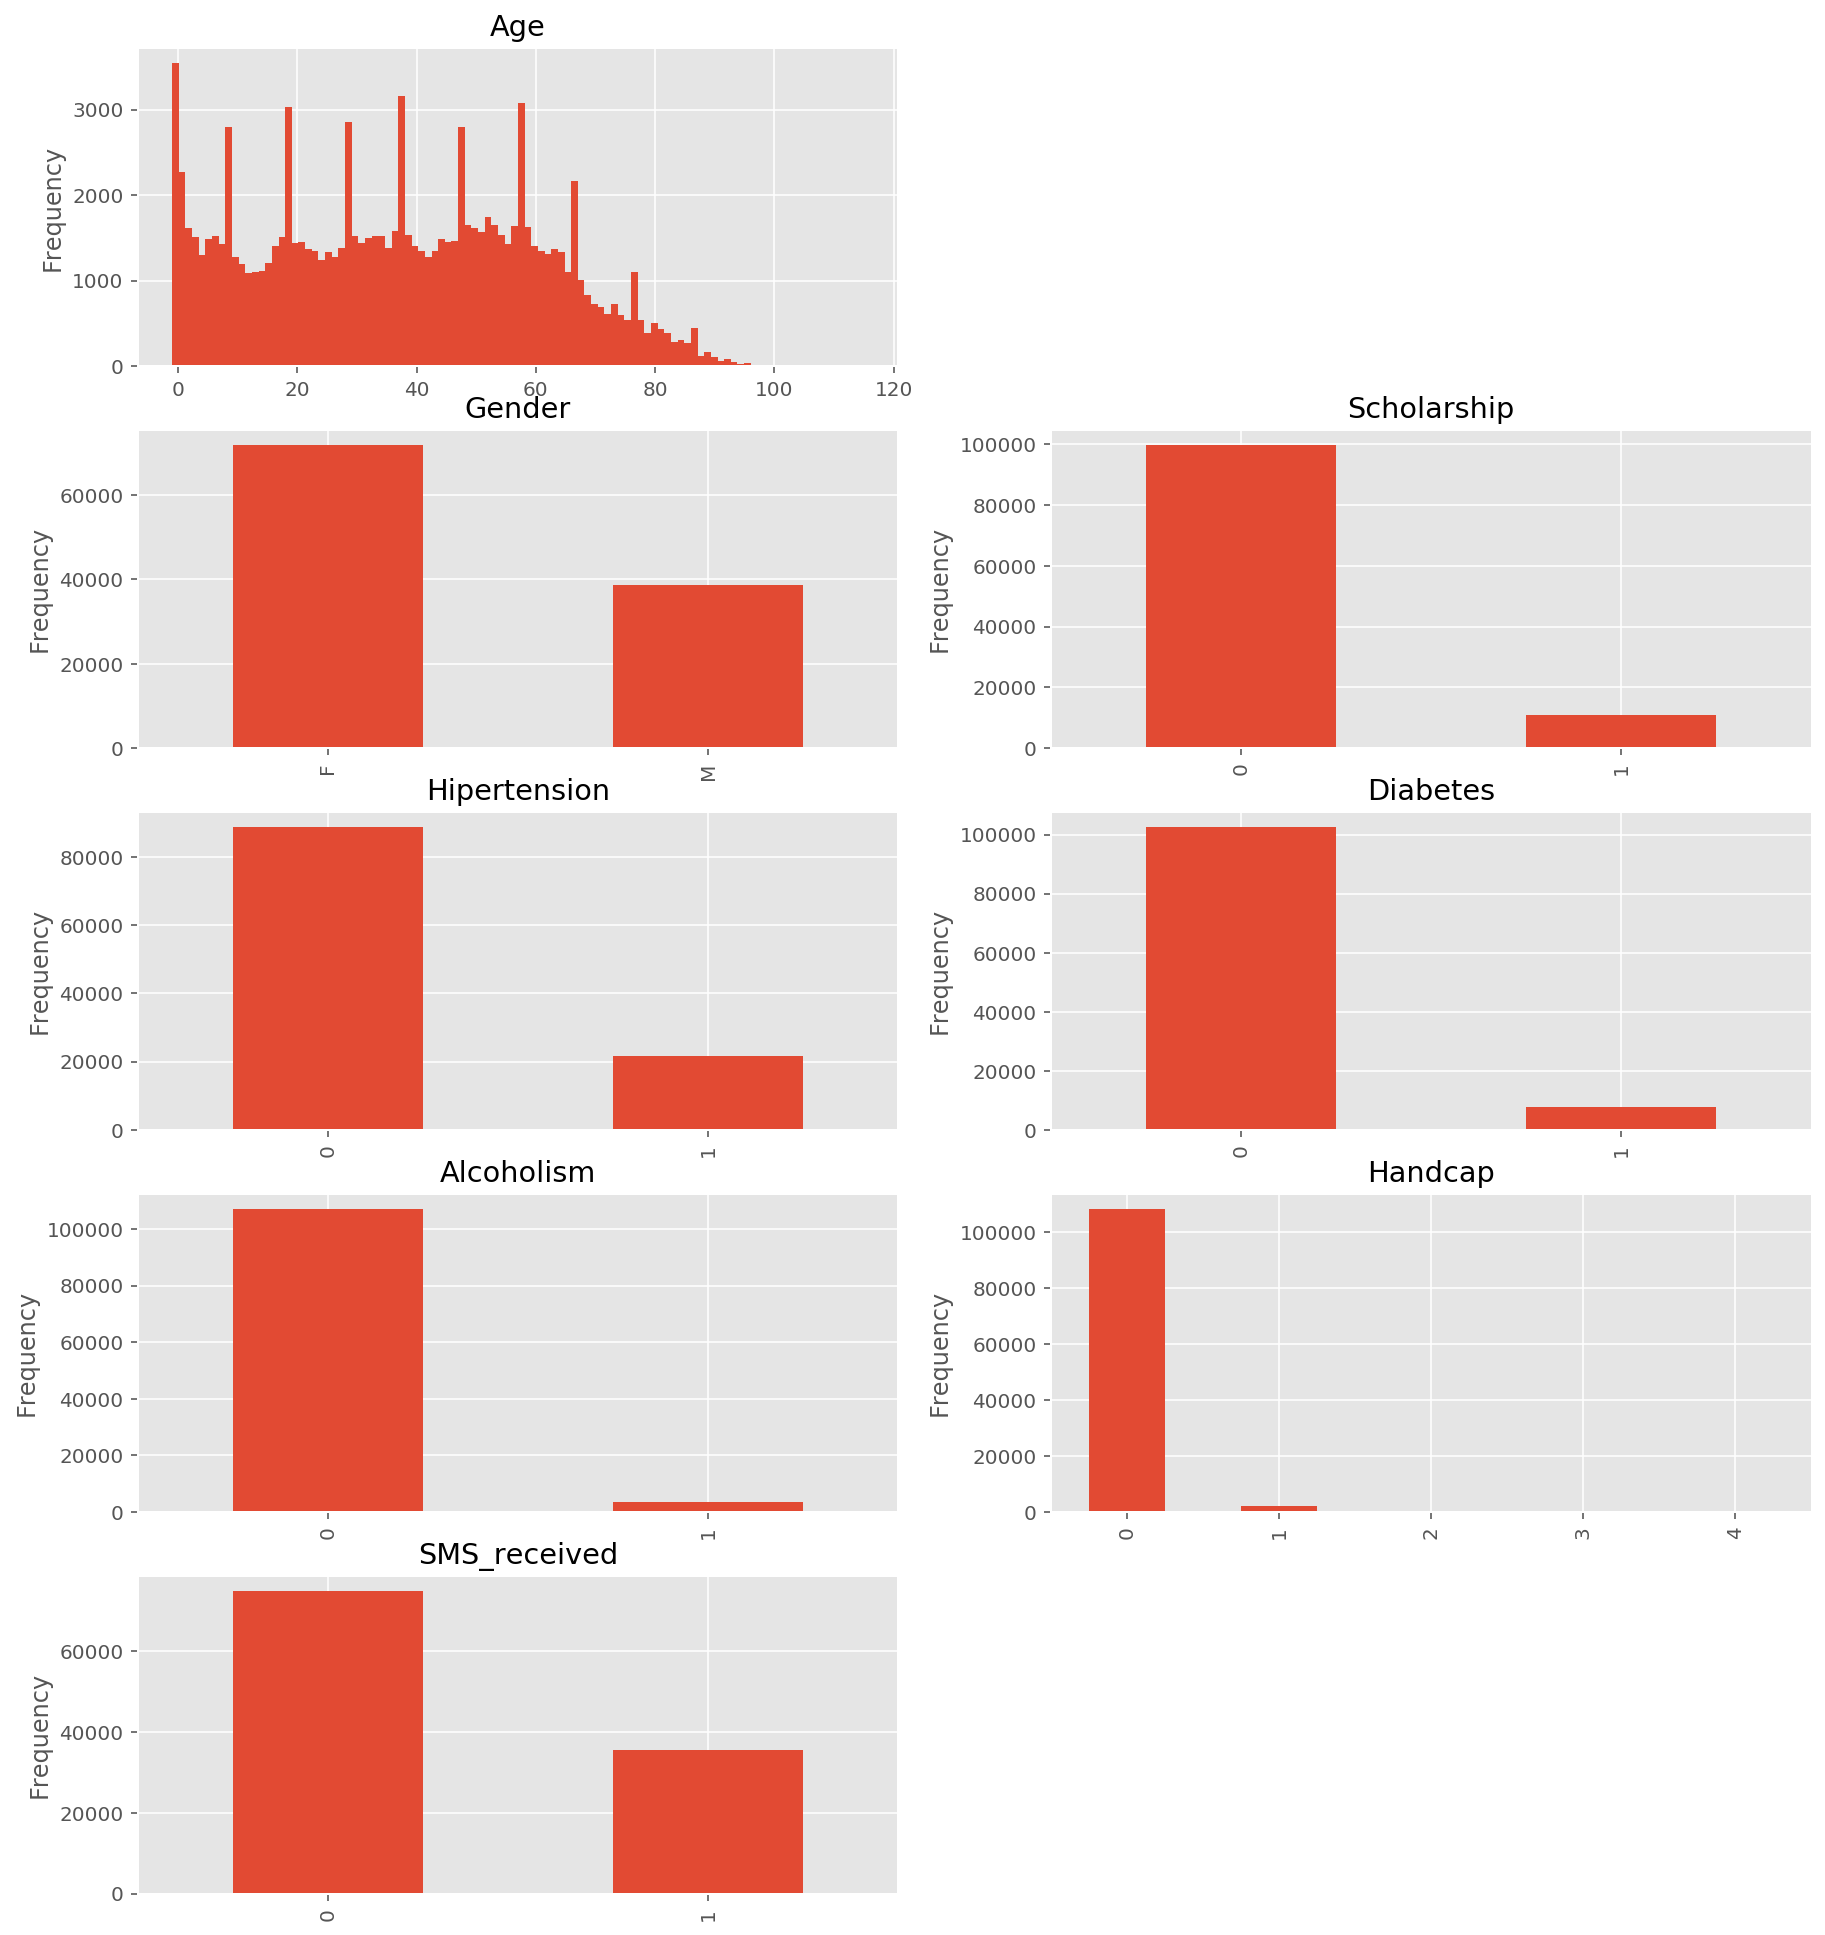

In [9]:
features_plots(discrete_vars)

In [10]:
# Counts of No-show
NoShow_sum = data['No-show'].value_counts()
NoShow_sum

No     88208
Yes    22319
Name: No-show, dtype: int64

In [11]:
# Proportion of Gender & No-show
gender_xtab = pd.crosstab(data['Gender'], data['No-show'], normalize='columns')
gender_xtab*100

No-show,No,Yes
Gender,,
F,64.898875,65.388234
M,35.101125,34.611766


In [12]:
# Proportion of SMS received & No-show
SMS_xtab = pd.crosstab(data['SMS_received'], data['No-show'], normalize='columns')
SMS_xtab*100

No-show,No,Yes
SMS_received,,
0,70.866588,56.162911
1,29.133412,43.837089


Text(0, 0.5, 'Frequency')

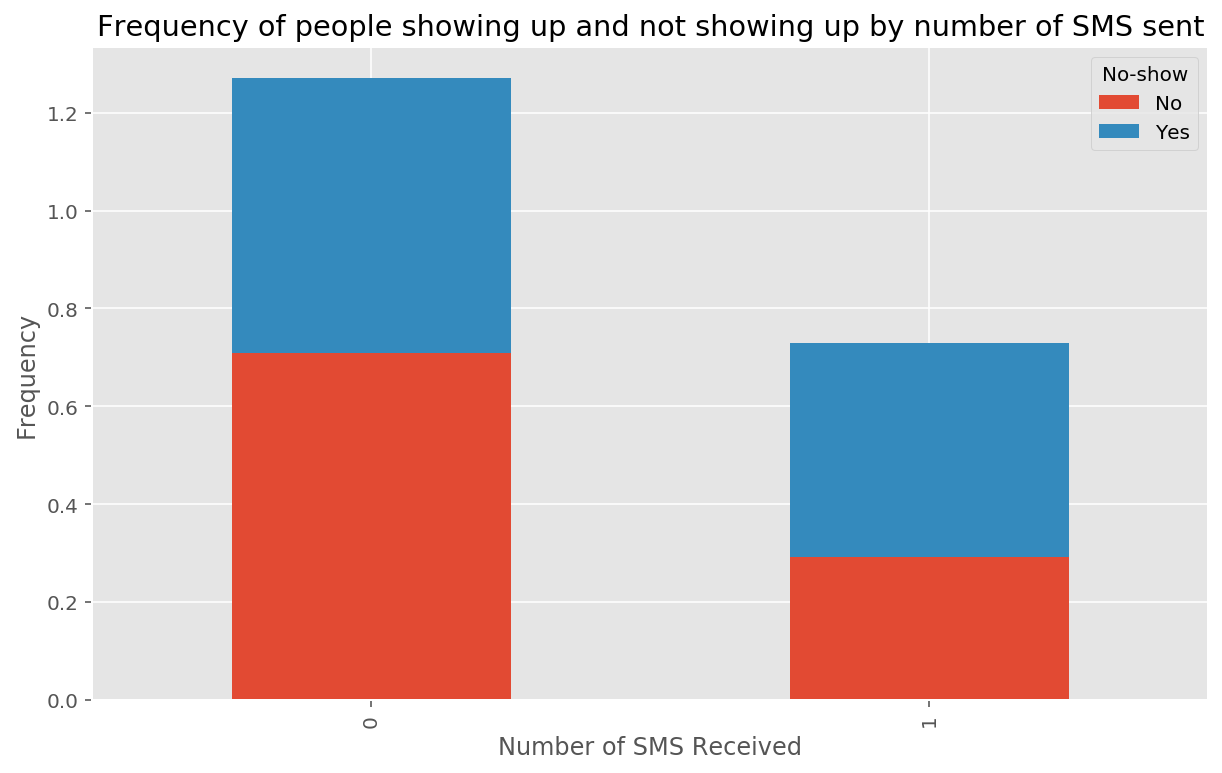

In [13]:
SMS_xtab1 = pd.crosstab(data['SMS_received'], data['No-show'], normalize='columns')

SMS_xtab1.plot(kind='bar', title='Frequency of people showing up and not showing up by number of SMS sent', 
              figsize=(10, 6), grid=True, stacked=True)
plt.xlabel('Number of SMS Received')
plt.ylabel('Frequency')

Observations:

- SMS reminders marginally increase the likelihood of a patient showing up on their appointment day.

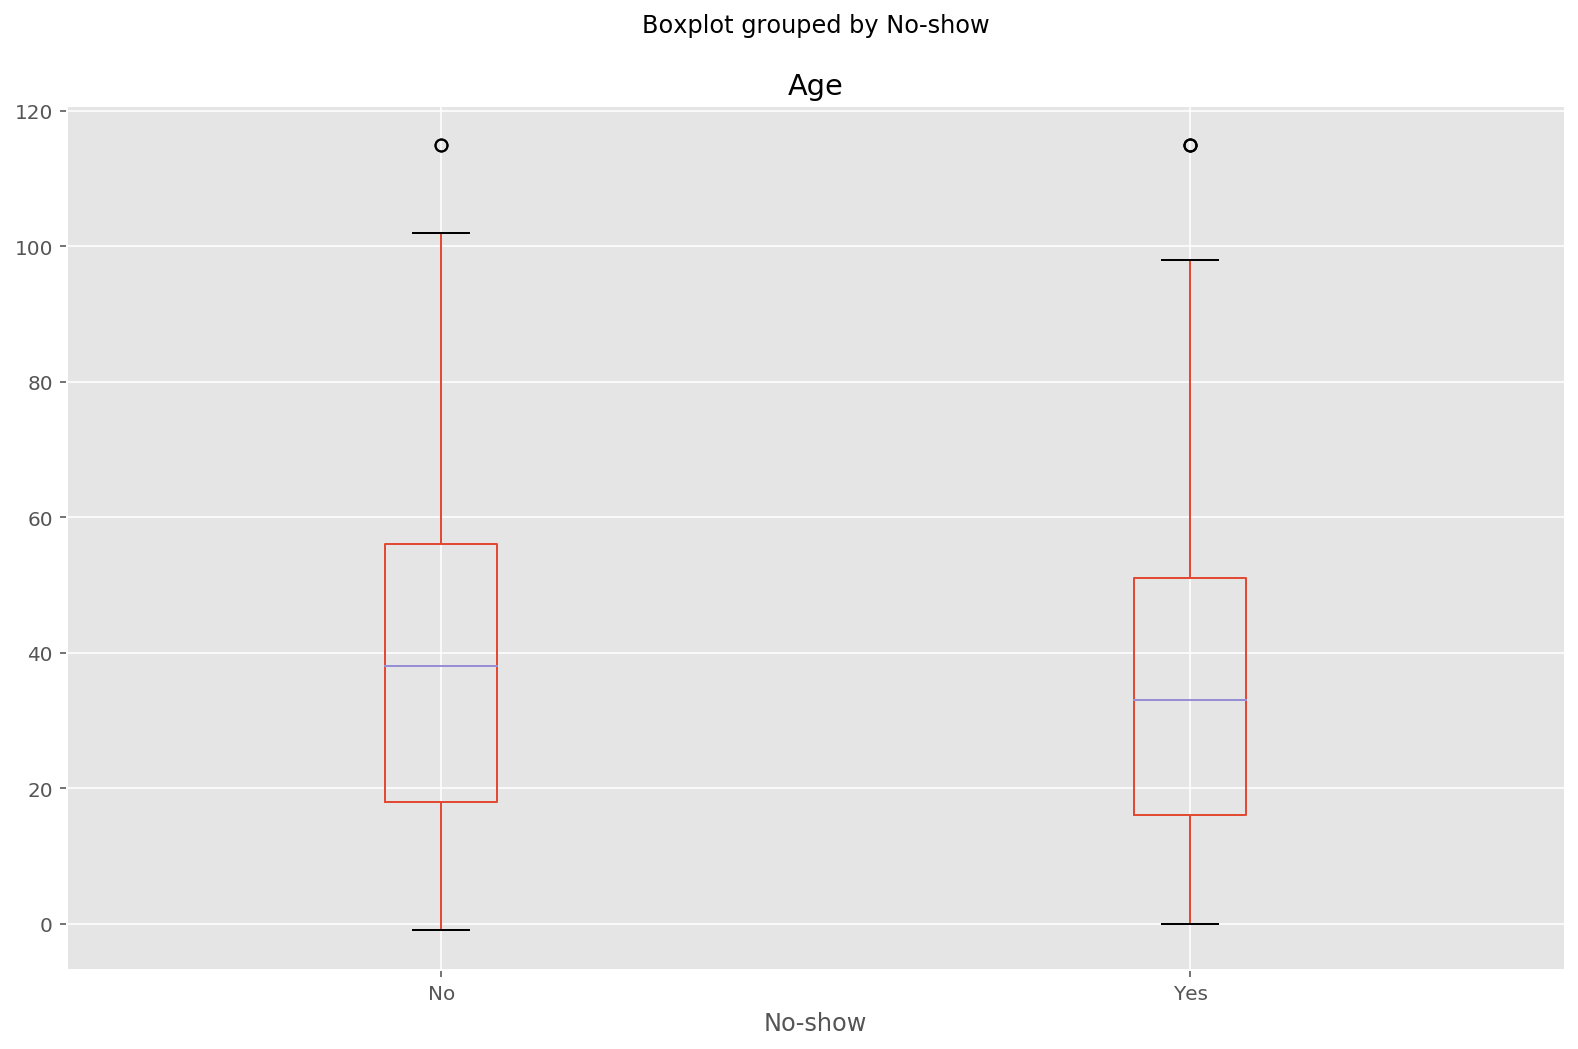

In [14]:
data.boxplot(column=['Age'], return_type='axes', by='No-show')
plt.show()

Observations:

- the median age of patient showing up relatively greater than of those not showing up.

In [15]:
# Count frequency of negative age observed
data[data['Age'] < 0]['Age'].value_counts().sum()

1

In [16]:
# Remove negative values
data = data[data['Age'] >= 0]

In [17]:
# Rename 'No-show' to 'Labels'
# data.rename(columns={'No-show':'Labels'}, inplace='True')

In [18]:
# Recode Gender & Status to integers
data['Gender_1'] = data['Gender'].map({"M":1, "F":0}).astype(int)
data['Labels'] = data['No-show'].map({"Yes":1, "No":0}).astype(int)

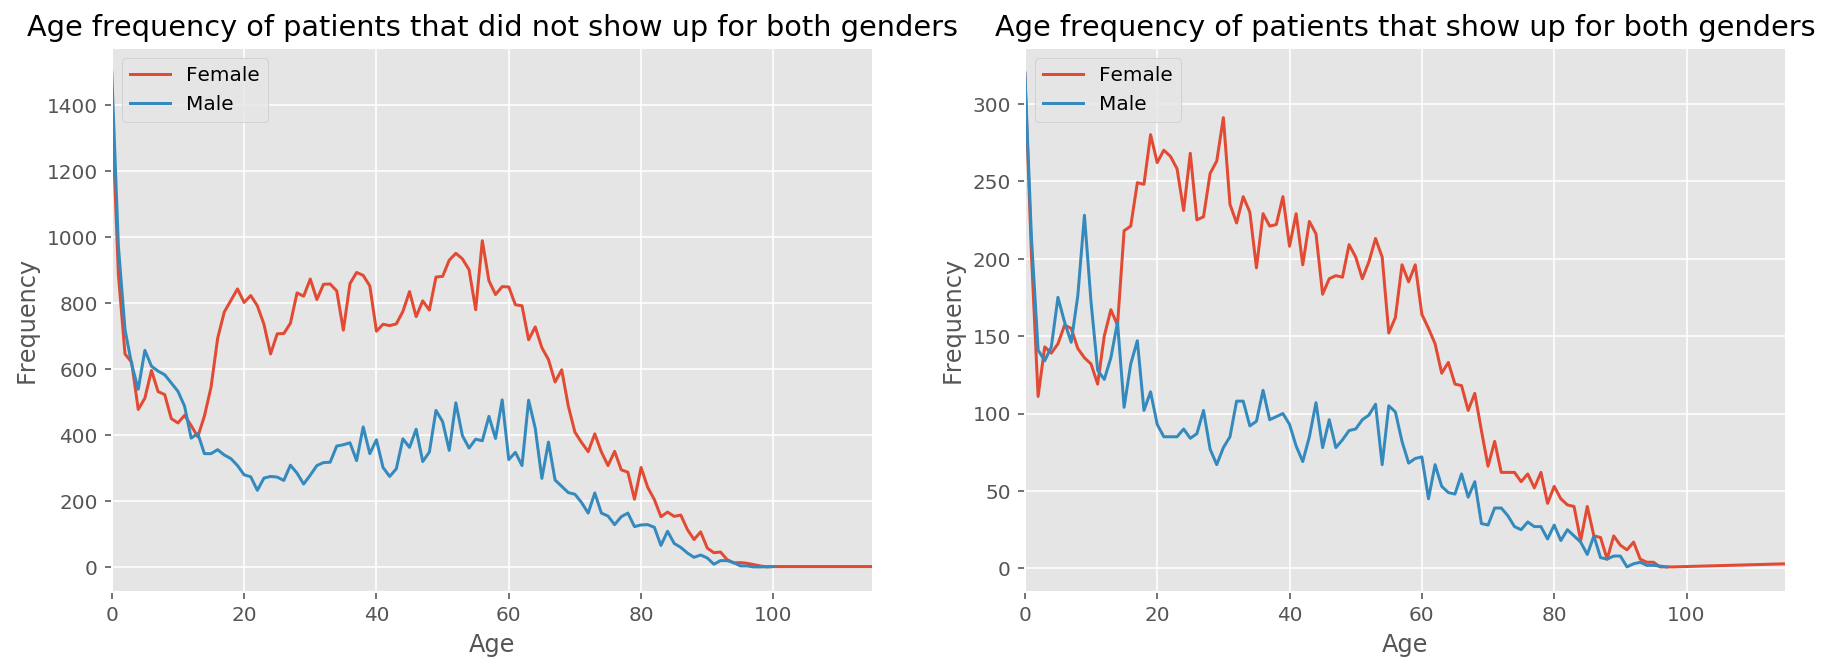

In [19]:
# Plot age frequency of patients that shows up or not, by gender
plt.figure(figsize=(15,5))

for i, Labels in enumerate(['did not show up', 'show up']):
    
    data_show = data[data['Labels']==i]
    plt.subplot(1, 2, i+1)
    
    for gender in [0, 1]:
        data_gender = data_show[data_show['Gender_1']==gender]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()

    plt.title('Age frequency of patients that %s for both genders'%Labels)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')

In [20]:
# Convert date objects to datetime format (without time part)
data['ScheduledDayDT'] = pd.to_datetime(data['ScheduledDay']).dt.date
data['ScheduledDayDT'] = pd.to_datetime(data['ScheduledDayDT'])
data['AppointmentDayDT'] = pd.to_datetime(data['AppointmentDay']).dt.date
data['AppointmentDayDT'] = pd.to_datetime(data['AppointmentDayDT'])

In [21]:
data['MonthAppt'] = data['AppointmentDayDT'].dt.month
data['MonthScheduled'] = data['ScheduledDayDT'].dt.month

In [22]:
data['ScheduledDayDT'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDayDT, dtype: datetime64[ns]

In [23]:
data['AppointmentDayDT'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDayDT, dtype: datetime64[ns]

In [24]:
data['MonthAppt'].tail()

110522    6
110523    6
110524    6
110525    6
110526    6
Name: MonthAppt, dtype: int64

In [25]:
data['MonthScheduled'].tail()

110522    5
110523    5
110524    4
110525    4
110526    4
Name: MonthScheduled, dtype: int64

In [26]:
# Create new feature: "AwaitingTime" - no. of days between scheduled date and appointment date
data['time_between_appts'] = data['AppointmentDayDT']- data['ScheduledDayDT']
data['AwaitingTime'] = data['time_between_appts']/np.timedelta64(1,'D')

In [27]:
data['AwaitingTime'].tail()

110522    35.0
110523    35.0
110524    41.0
110525    41.0
110526    41.0
Name: AwaitingTime, dtype: float64

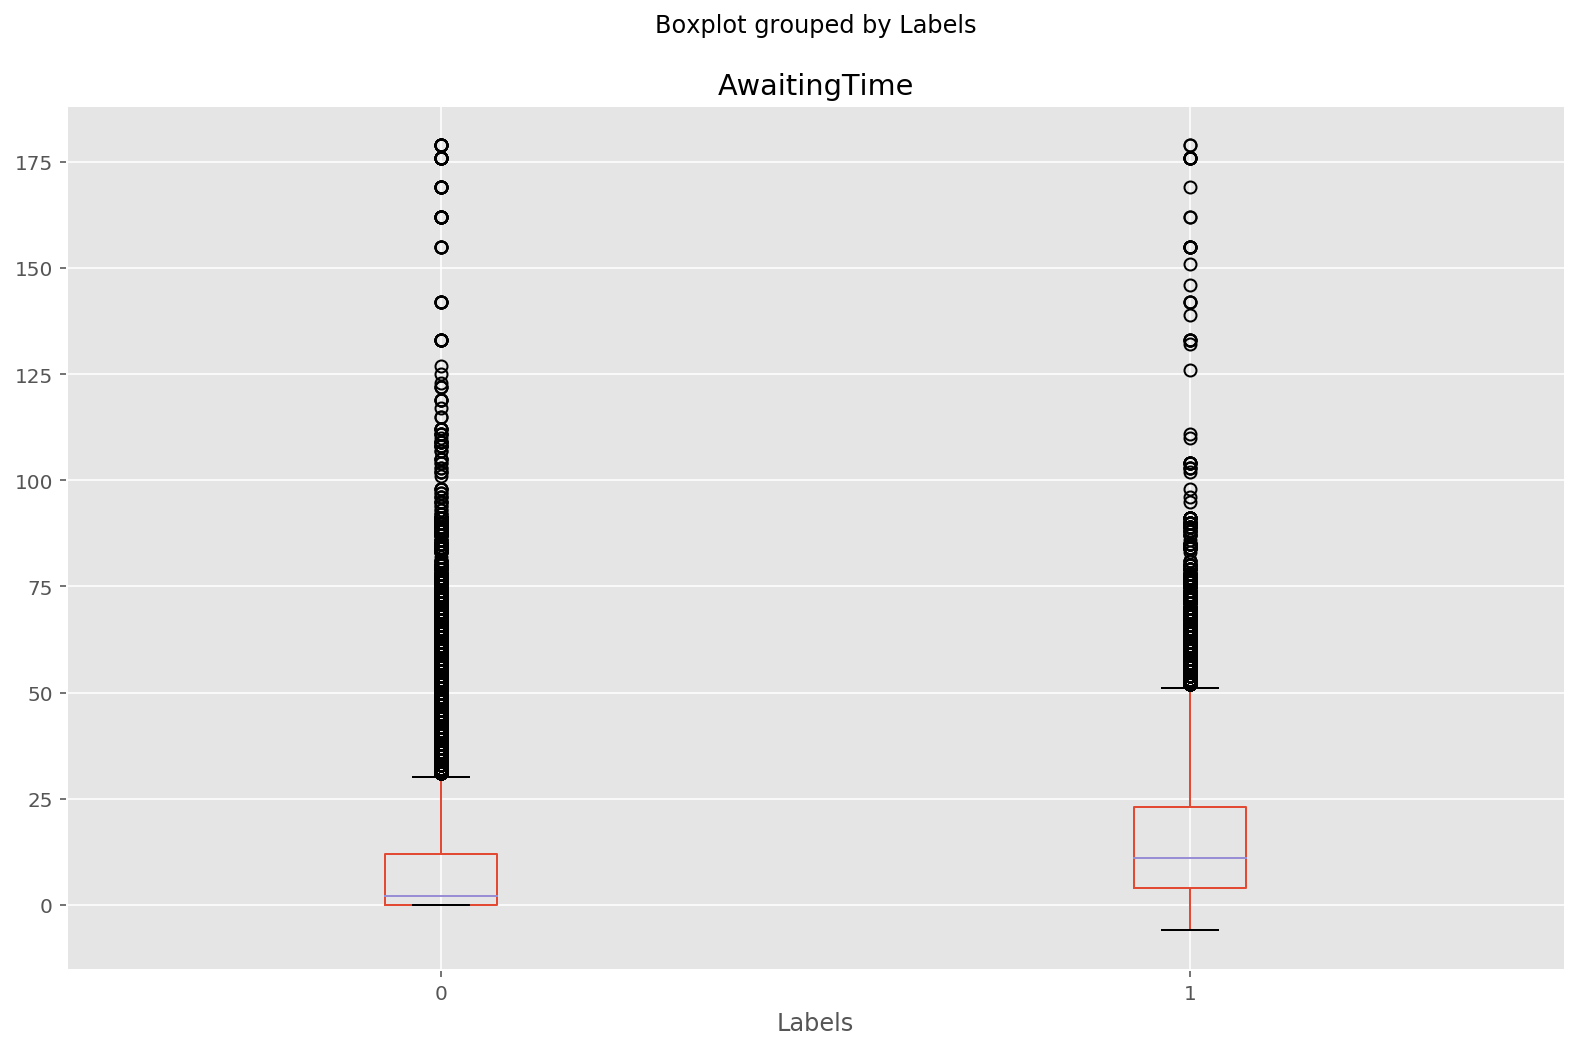

In [28]:
data.boxplot(column=['AwaitingTime'], return_type='axes', by='Labels')
plt.show()

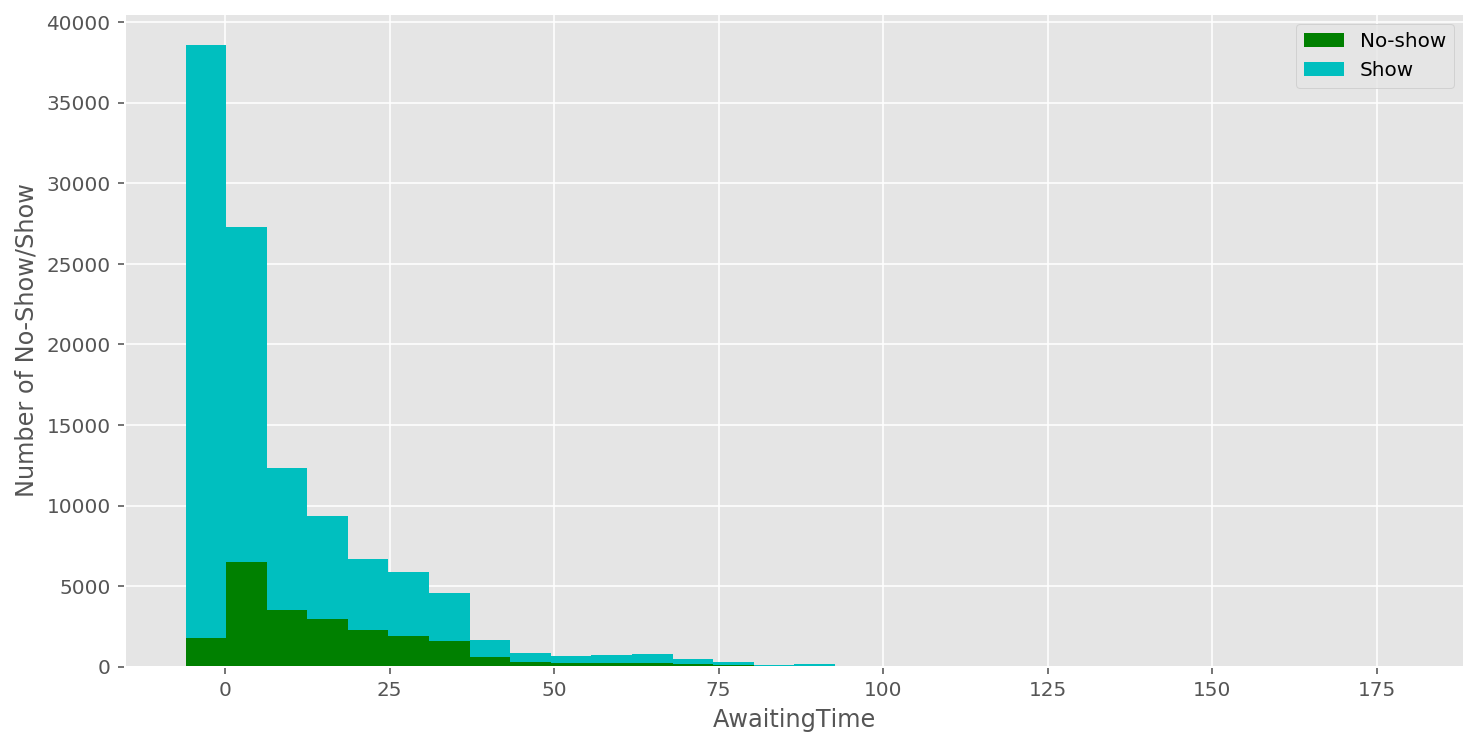

In [29]:
# Plot number of No-show by AwaitingTime segmentation
figure = plt.figure(figsize=(12,6))
plt.hist([data[data['Labels']==1]['AwaitingTime'],data[data['Labels']==0]['AwaitingTime']], 
         stacked=True, color = ['g','c'],
         bins = 30,label = ['No-show','Show'])
plt.xlabel('AwaitingTime')
plt.ylabel('Number of No-Show/Show')
plt.legend()

Observations:

- Patients who have their AwaitingTime in the third quartile are relatively more likely not to show up.

In [30]:
# Create new features - day of the week scheduled and appointment dates
data['DayAppt'] = data['AppointmentDayDT'].dt.dayofweek
data['DayScheduled'] = data['ScheduledDayDT'].dt.dayofweek

In [31]:
data['DayAppt'].tail()

110522    1
110523    1
110524    1
110525    1
110526    1
Name: DayAppt, dtype: int64

In [32]:
data['DayScheduled'].tail()

110522    1
110523    1
110524    2
110525    2
110526    2
Name: DayScheduled, dtype: int64

Text(0, 0.5, 'Frequency')

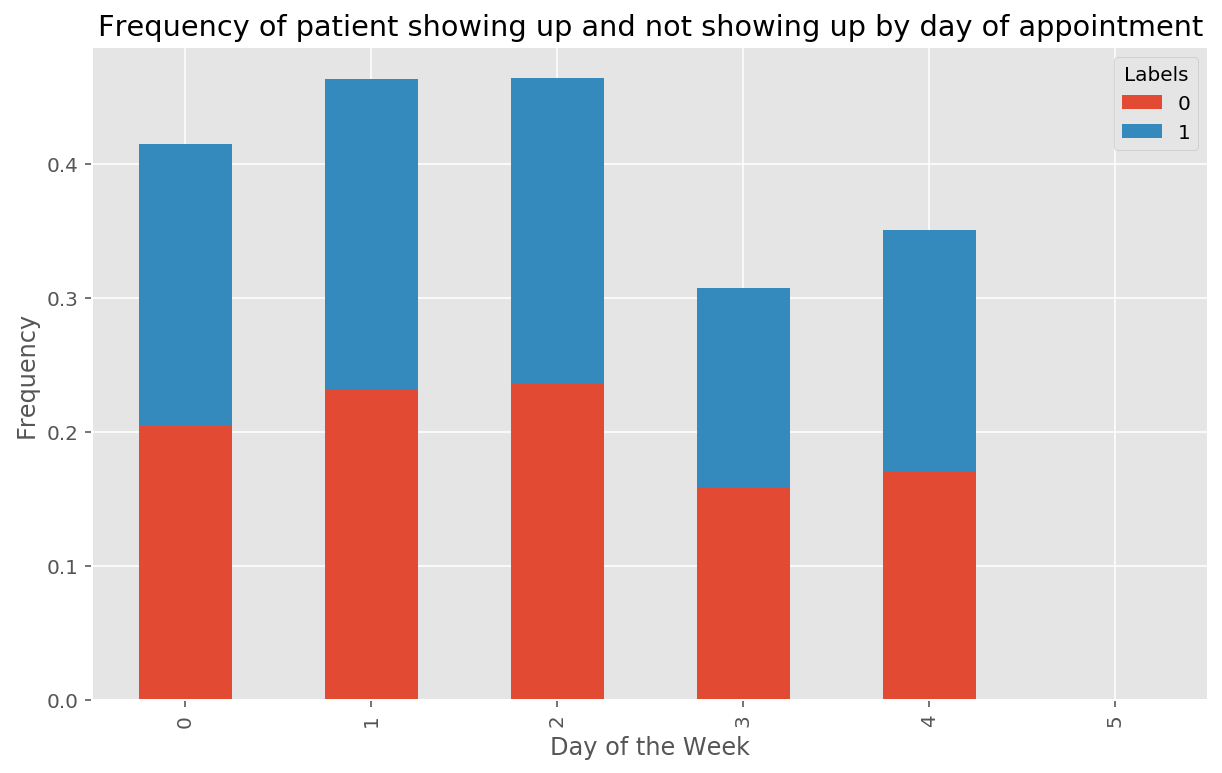

In [33]:
# Plot frequency of patient showing up and not by day of appointment
dow_xtab = pd.crosstab(data['DayAppt'], data['Labels'], normalize='columns')

dow_xtab.plot(kind='bar', title='Frequency of patient showing up and not showing up by day of appointment', 
              figsize=(10, 6), grid=True, stacked=True)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')

Observations:

- 0 represent Mondays, 5 is Saturdays with the rest within in order. No Sundays.
- The rate of patients not showing up mostly from Mondays to Wednesdays.
- The rate of patients showing up mostly on Tuesdays and Wednesdays.

In [34]:
# keep only desired features and labels
data1 = data[['Gender','Age','Hipertension','Diabetes','Alcoholism','SMS_received','Scholarship',
              'DayScheduled','DayAppt','AwaitingTime', 'MonthAppt', 'MonthScheduled', 'Labels']]

In [35]:
data1.head()

,Gender,Age,Hipertension,Diabetes,Alcoholism,SMS_received,Scholarship,DayScheduled,DayAppt,AwaitingTime,MonthAppt,MonthScheduled,Labels
0,F,62,1,0,0,0,0,4,4,0.0,4,4,0
1,M,56,0,0,0,0,0,4,4,0.0,4,4,0
2,F,62,0,0,0,0,0,4,4,0.0,4,4,0
3,F,8,0,0,0,0,0,4,4,0.0,4,4,0
4,F,56,1,1,0,0,0,4,4,0.0,4,4,0


In [36]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,110526.0,37.089219,23.110026,0.0,18.0,37.0,55.0,115.0
Hipertension,110526.0,0.197248,0.397923,0.0,0.0,0.0,0.0,1.0
Diabetes,110526.0,0.071865,0.258266,0.0,0.0,0.0,0.0,1.0
Alcoholism,110526.0,0.030400,0.171686,0.0,0.0,0.0,0.0,1.0
SMS_received,110526.0,0.321029,0.466874,0.0,0.0,0.0,1.0,1.0
Scholarship,110526.0,0.098266,0.297676,0.0,0.0,0.0,0.0,1.0
DayScheduled,110526.0,1.851971,1.378515,0.0,1.0,2.0,3.0,5.0
DayAppt,110526.0,1.858260,1.371667,0.0,1.0,2.0,3.0,5.0
AwaitingTime,110526.0,10.183794,15.255034,-6.0,0.0,4.0,15.0,179.0
MonthAppt,110526.0,5.210041,0.473776,4.0,5.0,5.0,5.0,6.0


In [37]:
# Correlation analysis
corr=data1.corr()
corr=abs(corr)
corr['Labels']

Age               0.060327
Hipertension      0.035704
Diabetes          0.015181
Alcoholism        0.000197
SMS_received      0.126428
Scholarship       0.029134
DayScheduled      0.006014
DayAppt           0.001158
AwaitingTime      0.186228
MonthAppt         0.020879
MonthScheduled    0.160856
Labels            1.000000
Name: Labels, dtype: float64

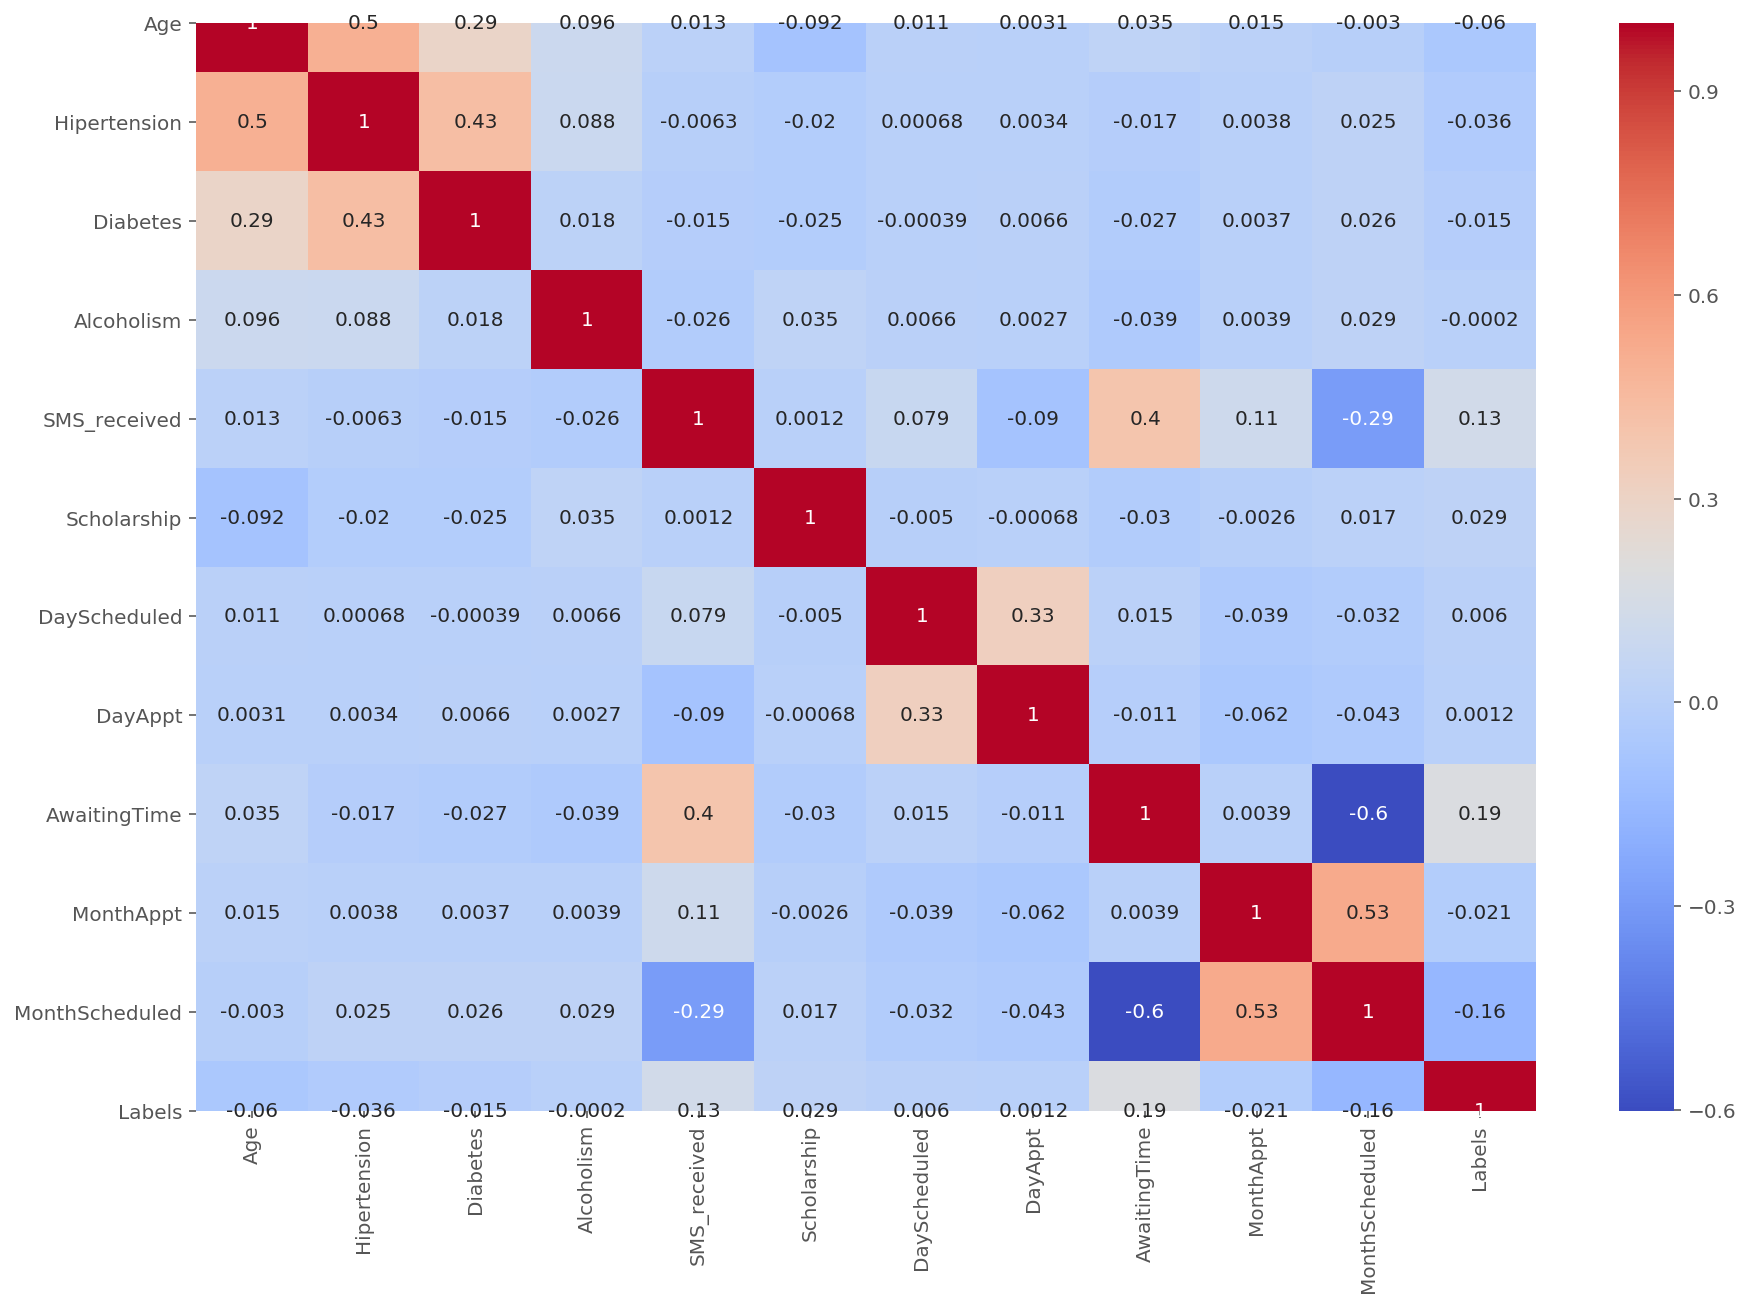

In [38]:
# Correlation Plot
plt.rc('figure', figsize=(15, 10))
sns.heatmap(data1.corr('pearson'),cmap='coolwarm',annot=True)